# **Import Libraries**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
    accuracy_score,
    mean_absolute_error
)
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier

## Import Dataset

In [2]:
df = pd.read_csv("IRIS.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Data Preprocessing

### Convert categorical data into numerical data

In [8]:
df["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

As there are 3 values in "Species", we'll convert them into 0,1,2 respectively

In [9]:
df['species'] = df['species'].map( 
    {'Iris-setosa': 0,
    'Iris-versicolor':1,
    'Iris-virginica':2}).astype(int)

In [10]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


# Data Visualization

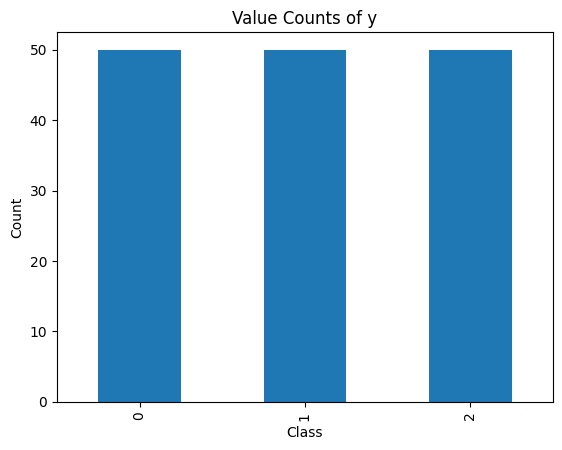

In [12]:
plt.figure()
df["species"].value_counts().plot(kind='bar')
plt.title('Value Counts of y')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show();

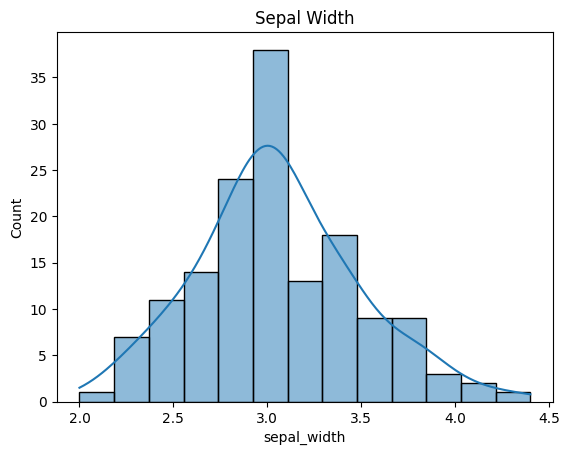

In [13]:
sns.histplot(x='sepal_width', data=df,kde=True)
plt.title('Sepal Width')
plt.show()

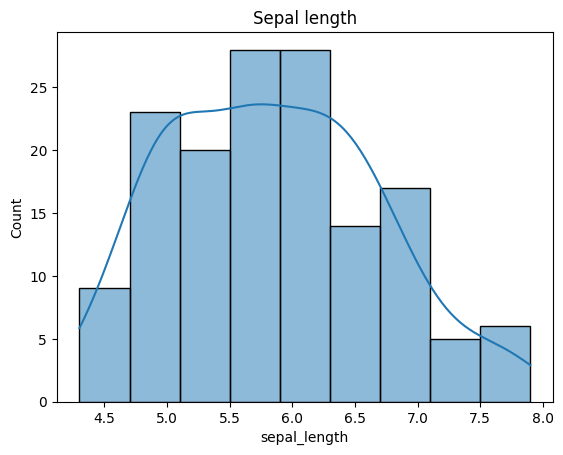

In [14]:
sns.histplot(x='sepal_length', data=df,kde=True)
plt.title('Sepal length')
plt.show()

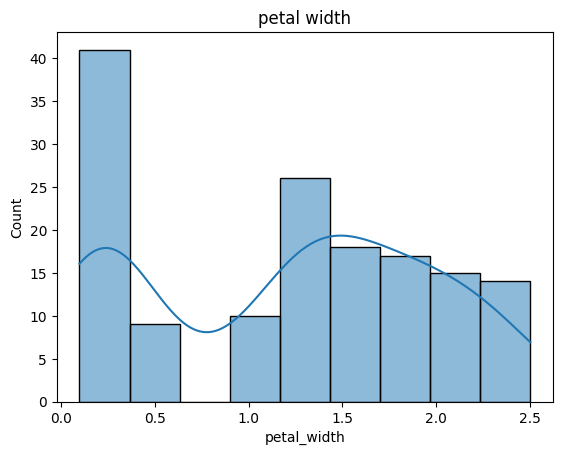

In [15]:
sns.histplot(x='petal_width', data=df,kde=True)
plt.title('petal width')
plt.show()

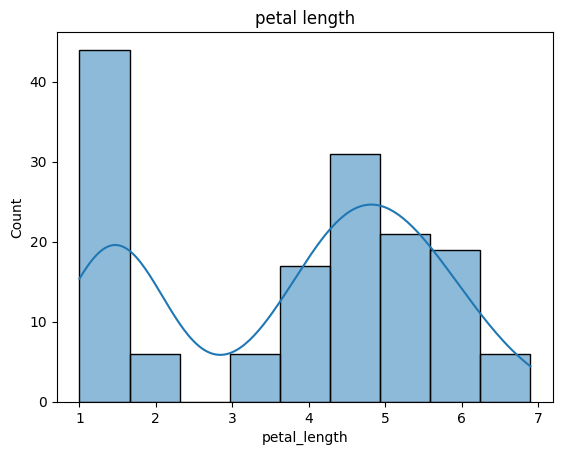

In [16]:
sns.histplot(x='petal_length', data=df,kde=True)
plt.title('petal length')
plt.show()

### Correlation

Check for the correlation between features

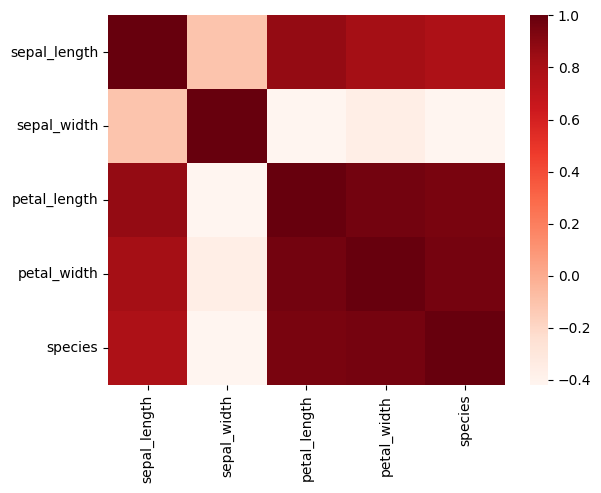

In [17]:
corr= df.corr()
sns.heatmap(corr,cmap='Reds');

This shows that all the feature except "sepal_width" has high correlation with specoes.

### Drop Sepal_width

In [18]:
df.drop(columns=['sepal_width'], inplace=True)

In [19]:
df.head()

,sepal_length,petal_length,petal_width,species
0,5.1,1.4,0.2,0
1,4.9,1.4,0.2,0
2,4.7,1.3,0.2,0
3,4.6,1.5,0.2,0
4,5.0,1.4,0.2,0


## **Split Data**

In [20]:
X = df.drop("species", axis=1)
y = df["species"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42)

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,train_size=0.8,random_state = 42)

In [23]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (96, 3)
y_train shape: (96,)
X_val shape: (24, 3)
y_val shape: (24,)
X_test shape: (30, 3)
y_test shape: (30,)


## Model Creation

Create baseline model prediction

In [24]:
baseline_model = DummyClassifier(strategy="most_frequent")
baseline_model.fit(X_train, y_train)

baseline_predictions = baseline_model.predict(X_test)

baseline_accuracy = accuracy_score(y_test, baseline_predictions)
print("Baseline Accuracy:", baseline_accuracy)

Baseline Accuracy: 0.36666666666666664


# 1. Random Forest Classifer

In [25]:
model_rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [26]:
print('Training score: ', round(model_rf.score(X_train, y_train),3))
print('Validation score: ', round(model_rf.score(X_val, y_val),3))

Training score:  0.99
Validation score:  0.917


In [27]:
model_rf_y_pred = model_rf.predict(X_test)
print(model_rf_y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [28]:
accuracy_score(model_rf_y_pred,y_test)

1.0

#### Communication

Text(0.5, 1.0, 'Confusion Matrix for Test Data of RF Model')

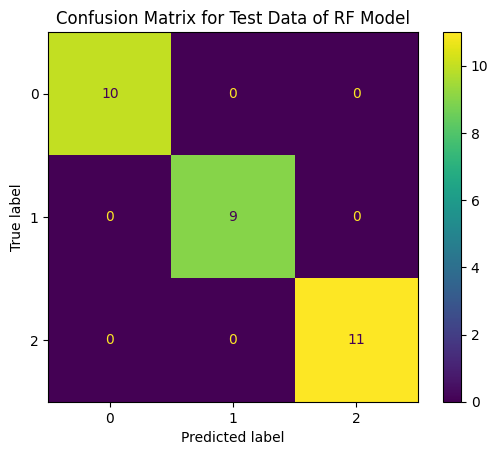

In [29]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(model_rf_y_pred, y_test), display_labels = [0, 1,2])
cm_display.plot()
plt.grid(False)
plt.title("Confusion Matrix for Test Data of RF Model")

# 2. Logistic Regression

In [30]:
model_LG = LogisticRegression( max_iter=200)
model_LG.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [31]:
print('Training score: ', round(model_LG.score(X_train, y_train),3))
print('Validation score: ', round(model_LG.score(X_val, y_val),3))

Training score:  0.979
Validation score:  0.958


In [32]:
model_LG_y_pred = model_rf.predict(X_test)
print(model_LG_y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [33]:
accuracy_score(model_LG_y_pred,y_test)

1.0

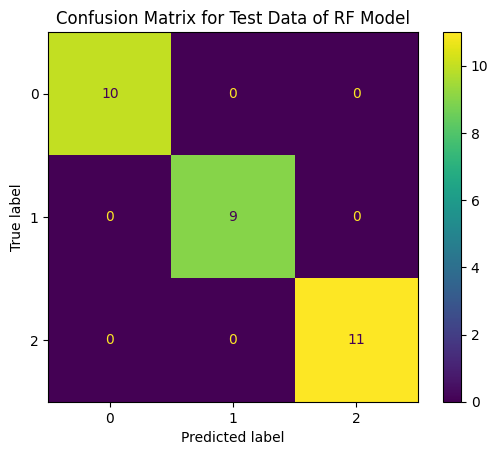

In [34]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(model_LG_y_pred, y_test), display_labels = [0, 1,2])
cm_display.plot()
plt.grid(False)
plt.title("Confusion Matrix for Test Data of RF Model");

## 3. KNN

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.fit_transform(X_val)

In [36]:
knn = KNeighborsClassifier(n_neighbors=3)  
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [37]:
print('Training score: ', round(knn.score(X_train, y_train),3))
print('Validation score: ', round(knn.score(X_val, y_val),3))

Training score:  0.969
Validation score:  0.917


In [38]:
predictions = knn.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 1.0


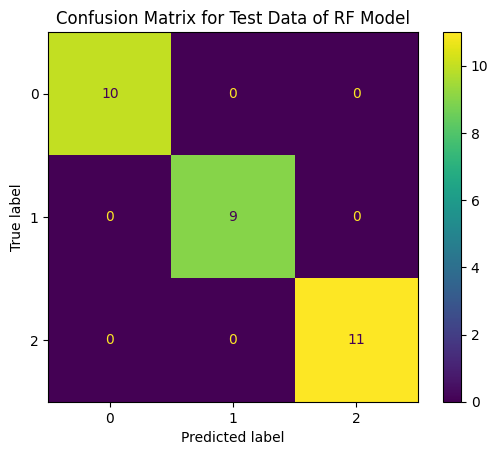

In [39]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(predictions, y_test), display_labels = [0, 1,2])
cm_display.plot()
plt.grid(False)
plt.title("Confusion Matrix for Test Data of RF Model");

# Result

The **Logistic Regression** model gives the hightest accruacy for the validation set as 95.8 %. While other 2 models gives around 91% accuracy on the validation data set.